In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
dataset = pd.read_excel('produksiPadi.xlsx')

# Display the first few rows of the datased
dataset.head()


,Tahun,Produksi Padi(Ton),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1970,18693649.0,NaN,NaN,NaN,NaN
1,1971,20483687.0,NaN,NaN,NaN,NaN
2,1972,19393933.0,NaN,NaN,Ubah data tersebut secara lagging,NaN
3,1973,21490578.0,NaN,NaN,NaN,NaN
4,1974,22476073.0,NaN,NaN,Lakukan Split Ratio --> 70 : 30,NaN


In [4]:
# Membersihkan data: hanya menyimpan kolom "Tahun" dan "Produksi Padi(Ton)"
data_cleaned = dataset[['Tahun', 'Produksi Padi(Ton)']].dropna()

# Menghapus data dengan nilai yang tidak valid (jika ada)
data_cleaned = data_cleaned.dropna()

In [5]:
data_cleaned.head()

,Tahun,Produksi Padi(Ton)
0,1970,18693649.0
1,1971,20483687.0
2,1972,19393933.0
3,1973,21490578.0
4,1974,22476073.0


In [6]:
data_cleaned.isnull().sum()

Tahun                 0
Produksi Padi(Ton)    0
dtype: int64

# Preprocessing


In [7]:
#Menambahkan kolom lagging produksi
data_cleaned['Lag_Produksi'] = data_cleaned['Produksi Padi(Ton)'].shift(1)

data_cleaned = data_cleaned.dropna()

In [8]:
data_cleaned.head()

,Tahun,Produksi Padi(Ton),Lag_Produksi
1,1971,20483687.0,18693649.0
2,1972,19393933.0,20483687.0
3,1973,21490578.0,19393933.0
4,1974,22476073.0,21490578.0
5,1975,22339455.0,22476073.0


In [9]:
# Memisahkan fitur (X) dan target (y)
X = data_cleaned[['Lag_Produksi']]  # Fitur: Produksi tahun sebelumnya
y = data_cleaned['Produksi Padi(Ton)']  # Target: Produksi padi saat ini

In [10]:
X.head()

,Lag_Produksi
1,18693649.0
2,20483687.0
3,19393933.0
4,21490578.0
5,22476073.0


In [11]:
y.head()

1    20483687.0
2    19393933.0
3    21490578.0
4    22476073.0
5    22339455.0
Name: Produksi Padi(Ton), dtype: float64

**Split Data**

In [12]:
# Split data ke data train dan data test dengan perbandingan 70 : 30
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (36, 1)
Shape X_test: (16, 1)
Shape y_train: (36,)
Shape y_test: (16,)


# Modeling

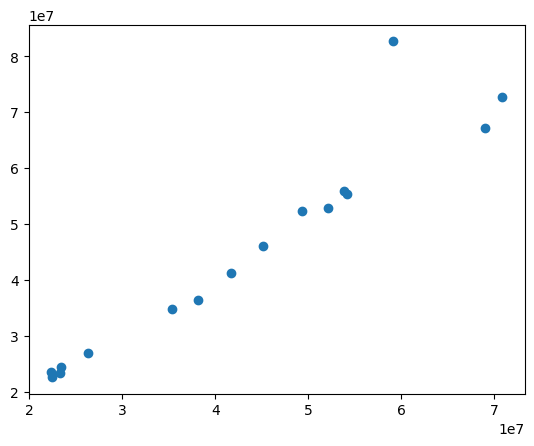

In [14]:
# Modeling Menggunakan Linier Regression
model = LinearRegression()
model.fit(X_train,y_train)

# Prediksi data testing
predictions = model.predict(X_test)

plt.scatter(y_test,predictions)

# Evaluasi

In [15]:
# Evaluasi model: MSE, RMSE, dan MAPE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions) * 100

# Menampilkan hasil evaluasi
print(f"Model Evaluation Results:\n")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")

Model Evaluation Results:

Mean Squared Error (MSE): 36,689,087,343,786.89
Root Mean Squared Error (RMSE): 6,057,151.75
Mean Absolute Percentage Error (MAPE): 5.14%



# Make Prediction


In [16]:
data_cleaned.tail()

,Tahun,Produksi Padi(Ton),Lag_Produksi
48,2018,59101577.84,81148617.00
49,2019,54604033.34,59101577.84
50,2020,54649202.24,54604033.34
51,2021,53802637.44,54649202.24
52,2022,54338410.44,53802637.44


In [17]:
Predict = data_cleaned['Produksi Padi(Ton)'].iloc[-1]

In [18]:
# Memprediksi pada tahun 2023 dan 2024
predict_2023 = model.predict(np.array([[Predict]]))

predict_2024 = model.predict(np.array([[predict_2023[0]]]))

# Menampilkan hasil prediksi
print(f"Prediksi Produksi Padi (Ton) untuk tahun 2023: {predict_2023[0]:,.2f} Ton")
print(f"Prediksi Produksi Padi (Ton) untuk tahun 2024: {predict_2024[0]:,.2f} Ton")

Prediksi Produksi Padi (Ton) untuk tahun 2023: 55,703,980.48 Ton
Prediksi Produksi Padi (Ton) untuk tahun 2024: 57,078,475.55 Ton


C:\Users\irsya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\irsya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
df_prediksi = pd.DataFrame({
    "Tahun": [2023, 2024],
    "Produksi Padi(Ton)": [predict_2023[0], predict_2024[0]],
    "Lag_Produksi": [data_cleaned['Produksi Padi(Ton)'].iloc[-1], predict_2023[0]]
})

# Menggabungkan DataFrame asli dengan hasil prediksi
df_final = pd.concat([data_cleaned, df_prediksi], ignore_index=True)

pd.options.display.float_format = '{:,.2f}'.format

In [20]:
# Menampilkan 5 baris terakhir dari data yang sudah termasuk prediksi
print("\n5 Baris Terakhir dari Data:")
df_final.tail(5)


5 Baris Terakhir dari Data:


,Tahun,Produksi Padi(Ton),Lag_Produksi
49,2020,"54,649,202.24","54,604,033.34"
50,2021,"53,802,637.44","54,649,202.24"
51,2022,"54,338,410.44","53,802,637.44"
52,2023,"55,703,980.48","54,338,410.44"
53,2024,"57,078,475.55","55,703,980.48"
